In [1]:
import numpy as np

A = np.array([[0.92, 0.92],
              [-0.92, 0.92],
              [0.92, -0.92],
              [-0.92, -0.92]])

# Check for linear independence:
rank_A = np.linalg.matrix_rank(A)
num_cols = A.shape[1]

if rank_A == num_cols:
    print("a) The columns are linearly independent.")
else:
    print("a) The columns are linearly dependent.")

a) The columns are linearly independent.


In [2]:
import numpy as np

A = np.array([[1, 1, 1],
              [-1, 1, -1],
              [1, -1, -1]])

# Check for linear independence:
rank_A = np.linalg.matrix_rank(A)
num_cols = A.shape[1]

if rank_A == num_cols:
    print("b) The columns are linearly independent.")
else:
    print("b) The columns are linearly dependent.")

b) The columns are linearly independent.


In [4]:
import numpy as np

A = np.array([[1, 2, 2],
              [3, 4, 5],
              [5, 6, 8]])

# Check for linear independence:
rank_A = np.linalg.matrix_rank(A)
num_cols = A.shape[1]
print(rank_A)
if rank_A == num_cols:
    print("c) The columns are linearly independent.")
else:
    print("c) The columns are linearly dependent.")

2
c) The columns are linearly dependent.


In [5]:
import numpy as np

A = np.array([[5, 2],
              [-5, 2],
              [5, -2]])

rank_A = np.linalg.matrix_rank(A)
print(f"d) The rank of the matrix is: {rank_A}")

d) The rank of the matrix is: 2


In [6]:
import numpy as np

A = np.array([[75, -10],
              [-10, 12]])

rank_A = np.linalg.matrix_rank(A)
print(f"d) The rank of the matrix is: {rank_A}")

d) The rank of the matrix is: 2


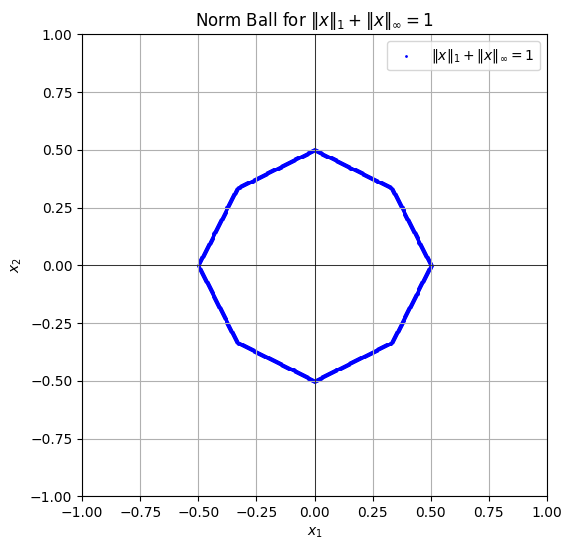

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(-1, 1, 500)
y_vals = np.linspace(-1, 1, 500)
X, Y = np.meshgrid(x_vals, y_vals)

norm1 = np.abs(X) + np.abs(Y)
norminf = np.maximum(np.abs(X), np.abs(Y))

mask = np.isclose(norm1 + norminf, 1, atol=0.01)

X_valid = X[mask]
Y_valid = Y[mask]

plt.figure(figsize=(6, 6))
plt.scatter(X_valid, Y_valid, s=1, color='blue', label=r'$\|x\|_1 + \|x\|_\infty = 1$')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(r"Norm Ball for $\|x\|_1 + \|x\|_\infty = 1$")
plt.legend()
plt.grid(True)

plt.show()


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

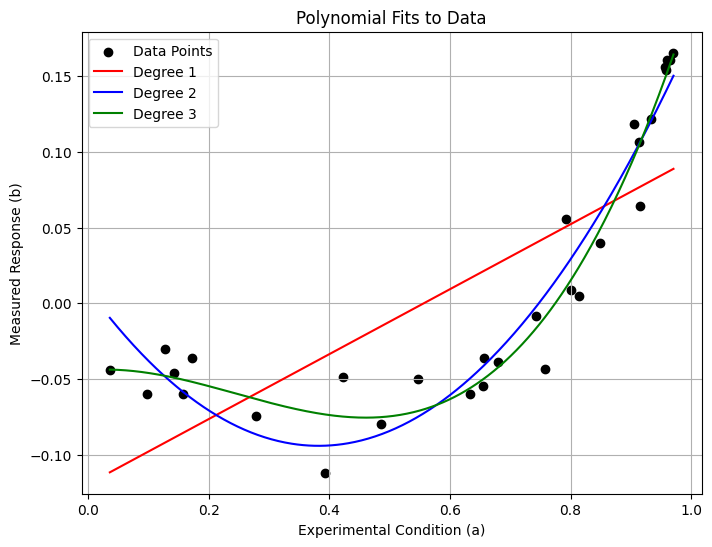

In [26]:

data = loadmat("polydata.mat")
a = data["a"].flatten()  # Convert to 1D array
b = data["b"].flatten()

# Define polynomial fitting function
def polynomial_fit(a, b, p):
    A = np.vander(a, p + 1, increasing=True)
    coeffs, _, _, _ = np.linalg.lstsq(A, b, rcond=None)
    return coeffs

a_range = np.linspace(min(a), max(a), 500)

plt.figure(figsize=(8, 6))
plt.scatter(a, b, color="black", label="Data Points")

degrees = [1, 2, 3]
colors = ["red", "blue", "green"]
for p, color in zip(degrees, colors):
    coeffs = polynomial_fit(a, b, p)
    b_fit = np.polyval(coeffs[::-1], a_range)
    plt.plot(a_range, b_fit, color=color, label=f"Degree {p}")

plt.xlabel("Experimental Condition (a)")
plt.ylabel("Measured Response (b)")
plt.title("Polynomial Fits to Data")
plt.legend()
plt.grid(True)
plt.show()
